### Coarse Tip Clearance Test Objective


### Procedure
- Initiate sweep from 30-100% throttle in increments of 5%, holding each throttle for 2 seconds.
- At each throttle step, allow ~0.5s for transient behaviour to settle and then average over the remaining data (~250 samples) to produce a single DC measurement for thrust, power, rpm, etc. at each point in the sweep.
- Repeat experiment at least once for each aerodynamic configuration, disassembling and reassembling between tests to ensure repeatability.

### Coarse Tip Clearance Test Configurations
| Duct Inner Diameter   | Propeller Diameter | Static Tip Clearance | Clearance to Height Ratio (%) | Test Status |
|-                      |-                   |-                     |-                              |-            |
| 137 mm                | 5 in / 127 mm      | 5 mm                 | 71.4 %                        | Waiting     |
| 133 mm                | 5 in / 127 mm      | 3 mm                 | 42.9 %                        | Waiting     |
| 129 mm                | 5 in / 127 mm      | 1 mm                 | 14.3 %                        | Waiting     |

### Hypothesis
- As tip clearance decreases, we expect thrust to electrical power efficiency (kgf/W) to increase.
- We expect all three 3D printed ducts to consume more power and produce less thrust relative to an equivalent propeller in open air. This is because the tip clearance to blade height ratio is too high for the duct to prevent the formation of blade tip vortices. These vortices are trapped by the duct rather than diffusing into open air, resulting in additional power loss.  

In [1]:
from runner import test_run, TestPlan, TestStep
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

### Specify Test Plan
Initialize a test plan object which sweeps from 0 to 100% throttle in increments of 5%, holding at each step for 2 seconds

In [2]:
# 1. Create a test plan consisting of steps.
step_duration_ms = 2_000
step_range = np.arange(5, 101, 5)

steps = [
    TestStep(bottom_throttle=i, top_throttle=i, duration_ms=step_duration_ms)
    for i in step_range
]
plan = TestPlan("test", steps=steps)

plan

TestPlan(name='test', steps=[TestStep(duration_ms=2000, top_throttle=5, bottom_throttle=5, pitch_angle=None, roll_angle=None), TestStep(duration_ms=2000, top_throttle=10, bottom_throttle=10, pitch_angle=None, roll_angle=None), TestStep(duration_ms=2000, top_throttle=15, bottom_throttle=15, pitch_angle=None, roll_angle=None), TestStep(duration_ms=2000, top_throttle=20, bottom_throttle=20, pitch_angle=None, roll_angle=None), TestStep(duration_ms=2000, top_throttle=25, bottom_throttle=25, pitch_angle=None, roll_angle=None), TestStep(duration_ms=2000, top_throttle=30, bottom_throttle=30, pitch_angle=None, roll_angle=None), TestStep(duration_ms=2000, top_throttle=35, bottom_throttle=35, pitch_angle=None, roll_angle=None), TestStep(duration_ms=2000, top_throttle=40, bottom_throttle=40, pitch_angle=None, roll_angle=None), TestStep(duration_ms=2000, top_throttle=45, bottom_throttle=45, pitch_angle=None, roll_angle=None), TestStep(duration_ms=2000, top_throttle=50, bottom_throttle=50, pitch_ang

In [ ]:
print(plan)

### Execute Tests

In [21]:
test_directory = Path("../test_data/coarse_tip_clearance/")
data_dict = {}

In [22]:
data_dict["test_1500um_clearance_coarse"] = test_run(
    filename=test_directory / "test_5in_6blade_1500um.csv", plan=plan
)

Loading saved data


### Data Analysis

In [23]:
# Aggregate test data
df_all = pd.concat(data_dict, names=["test_name"])
df_all

top_motor_rpm  bottom_motor_rpm  \
test_name                    time_ms                                      
test_1000um_clearance_coarse 0.316             1414.0            1342.0   
                             4.175                0.0               0.0   
                             7.159                0.0               0.0   
                             10.167               0.0               0.0   
                             13.159               0.0               0.0   
...                                               ...               ...   
                             41769.163         3942.0            4000.0   
                             41772.160         3942.0            3971.0   
                             41775.163         3800.0            3942.0   
                             41779.159         3800.0            3885.0   
                             41782.163         3771.0            3857.0   

                                        batt_voltage_V  batt_current_A  \
test_name                    time_ms                                     
test_1000um_clearance_coarse 0.316           16.905001           10.24   
                             4.175           16.863001           10.24   
                             7.159           16.884001           10.24   
                             10.167          16.863001           10.24   
                             13.159          16.863001           10.24   
...                                                ...             ...   
                             41769.163       16.023001           10.24   
                             41772.160       16.023001           10.24   
                             41775.163       16.023001           10.24   
                             41779.159       16.023001           10.24   
                             41782.163       16.023001           10.24   

                                        top_current_A  bottom_current_A  \
test_name                    time_ms                                      
test_1000um_clearance_coarse 0.316            0.08724          -0.20865   
                             4.175            0.14540          -0.19474   
                             7.159            0.15994          -0.25038   
                             10.167           0.24718          -0.34775   
                             13.159           0.17448          -0.20865   
...                                               ...               ...   
                             41769.163        0.05816          -0.23647   
                             41772.160       -0.10178          -0.29211   
                             41775.163       -0.33442          -0.16692   
                             41779.159        0.14540          -0.12519   
                             41782.163        0.14540           0.04173   

                                        thrust_N  torque_N  
test_name                    time_ms                        
test_1000um_clearance_coarse 0.316      0.022243  0.000353  
                             4.175      0.022243  0.000353  
                             7.159      0.022243  0.000353  
                             10.167     0.022243  0.000353  
                             13.159     0.022243  0.000353  
...                                          ...       ...  
                             41769.163  2.641215  0.011393  
                             41772.160  2.641215  0.011393  
                             41775.163  2.641215  0.007076  
                             41779.159  2.641215  0.007076  
                             41782.163  2.641215  0.007076  

[13680 rows x 8 columns]

In [25]:
# Select single test to analyze closer
test_data = df_all.loc["test_1500um_clearance_coarse"]
test_data

KeyError: 'test_1500um_clearance_coarse'

In [11]:
# Extract raw data from a loaded test csv
top_current_raw = test_data["top_current_A"]
bottom_current_raw = test_data["bottom_current_A"]
hall_current_raw = top_current_raw + bottom_current_raw

shunt_current_raw = test_data["batt_current_A"]
batt_voltage = test_data["batt_voltage_V"]

top_rpm = test_data["top_motor_rpm"]
bottom_rpm = test_data["bottom_motor_rpm"]

thrust_N = test_data["thrust_N"]
time_ms = test_data.index

# Determine mean sample rate
sample_rate_ms = np.mean(np.diff(time_ms))

In [12]:
# Generate buckets for averaging based on step duration defined in testing
stable_step_duration_ms = step_duration_ms / 2
transient_offset_ms = (
    500  # Ignore first 500 ms of each throttle step to allow transients to settle
)
step_start_times = np.arange(len(step_range)) * step_duration_ms


# Aggregate data for each throttle step
df_steps = (
    pd.concat(
        [
            df_all.loc[
                (
                    slice(None),
                    slice(
                        t_start + transient_offset_ms,
                        t_start + transient_offset_ms + stable_step_duration_ms,
                    ),
                ),
                :,
            ]
            for t_start in step_start_times
        ],
        keys=step_range,
        names=["throttle"],
    )
    .groupby(["test_name", "throttle"])
    .agg(["mean", "std"])
)

df_steps

top_motor_rpm              \
                                               mean         std   
test_name                    throttle                             
test_1000um_clearance_coarse 5             1752.072   12.075183   
                             10            3138.288   23.438655   
                             15            4402.032   41.059646   
                             20            5696.148   50.895101   
                             25            6804.872   48.733927   
                             30            7918.744   80.068034   
                             35            8957.404  105.608738   
                             40            9894.228  131.503905   
                             45           10922.968  183.042753   
                             50           11742.924  103.624042   
                             55           12486.824  112.146853   
                             60           13435.916  139.758099   
                             65           14292.836  131.724769   
                             70           15090.468  104.273048   
                             75           15702.172  116.686991   
                             80           16377.660  134.289236   
                             85           16889.416  129.766406   
                             90           17457.664  124.177515   
                             95           18165.528   93.659563   
                             100          18635.684   91.041189   

                                      bottom_motor_rpm              \
                                                  mean         std   
test_name                    throttle                                
test_1000um_clearance_coarse 5                1758.536   28.397224   
                             10               3154.696   34.902900   
                             15               4465.256   46.447778   
                             20               5744.248   33.928973   
                             25               6960.544   51.791132   
                             30               8154.064   79.674967   
                             35               9233.492   95.274081   
                             40              10302.320  104.649547   
                             45              11402.192  109.585542   
                             50              12241.460   94.524897   
                             55              13124.260  103.401430   
                             60              14046.684  116.313246   
                             65              14961.128  120.245631   
                             70              15733.912  123.291343   
                             75              16485.564  123.831624   
                             80              17224.192  124.200039   
                             85              17854.512  120.117755   
                             90              18619.292  116.018965   
                             95              19199.572   98.956020   
                             100             19730.656   96.119538   

                                      batt_voltage_V           batt_current_A  \
                                                mean       std           mean   
test_name                    throttle                                           
test_1000um_clearance_coarse 5             16.866613  0.019083       10.24000   
                             10            16.846452  0.019091       10.24000   
                             15            16.823939  0.016413       10.24000   
                             20            16.788491  0.024246       10.24000   
                             25            16.724316  0.023424       10.24000   
                             30            16.648884  0.026261       10.24000   
                             35            16.589832  0.005644       10.24000   
                             40            16.509529  0.025072       10.240

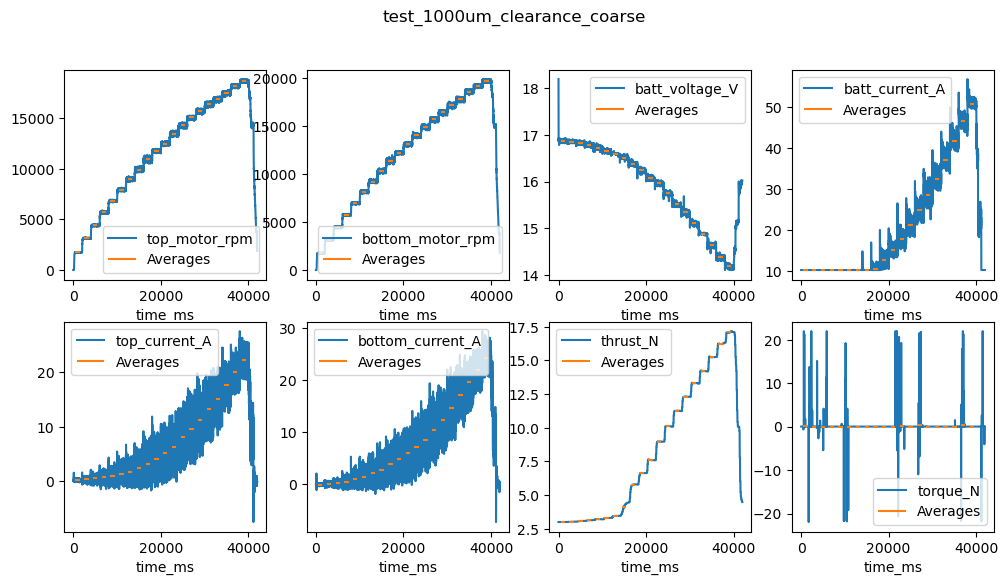

In [13]:
# Debug plots
fig = plt.figure(figsize=(12, 6*len(data_dict)))
subfigs = fig.subfigures(len(data_dict), 1)
if not isinstance(subfigs, np.ndarray):
    subfigs = np.array([subfigs])
for subfig, (n, grp) in zip(subfigs, df_all.groupby("test_name")):
    axs = subfig.subplots(2, 4)
    for ax, col in zip(axs.flat, grp):
        grp.reset_index("test_name").plot(ax=ax, y=col)
        ax.hlines(
            df_steps[col].loc[n]["mean"],
            step_start_times + transient_offset_ms,
            step_start_times + transient_offset_ms + stable_step_duration_ms,
            colors="C1",
            label="Averages",
        )
        ax.legend()
    subfig.suptitle(n)

In [14]:
thrust_mean_g = df_steps["thrust_N"]["mean"] / 9.81 * 1e3
thrust_g_err = 5

hover_thrust_g = 750
payload_thrust_g = 1200

hall_current_mean = df_steps["top_current_A"]["mean"] + df_steps["bottom_current_A"]["mean"]
hall_current_rel_err = (0.02294 * hall_current_mean + 0.3734) / hall_current_mean

batt_voltage_mean = df_steps["batt_voltage_V"]["mean"]
batt_voltage_rel_err = 0.025 / 14.8

shunt_current_mean = df_steps["batt_current_A"]["mean"]
shunt_power_mean = shunt_current_mean * batt_voltage_mean

batt_power_mean = hall_current_mean * batt_voltage_mean
batt_power_rel_err = np.sqrt(hall_current_rel_err**2 + batt_voltage_rel_err**2)

thrust_power_rel_err = np.sqrt((thrust_g_err / thrust_mean_g)**2 + batt_power_rel_err**2)
thrust_mean_g = thrust_mean_g * (thrust_mean_g > 0)

df_thrust_power = pd.DataFrame(
    {
        "thrust_mean_g": thrust_mean_g,
        "batt_power_mean": batt_power_mean,
        "shunt_power_mean": shunt_power_mean,
        "thrust_power_g_W": thrust_mean_g / batt_power_mean,
        "shunt_thrust_power_g_W": thrust_mean_g / shunt_power_mean,
        "batt_power_err": batt_power_rel_err * batt_power_mean,
        "thrust_g_err": thrust_g_err,
        "thrust_power_err": thrust_power_rel_err * (thrust_mean_g / batt_power_mean)
    }
)

batt_power_rel_err

test_name                     throttle
test_1000um_clearance_coarse  5           6.757255
                              10          1.216252
                              15          0.598382
                              20          0.359772
                              25          0.225680
                              30          0.165619
                              35          0.123428
                              40          0.096339
                              45          0.077606
                              50          0.065650
                              55          0.056500
                              60          0.050941
                              65          0.045688
                              70          0.041759
                              75          0.038822
                              80          0.036416
                              85          0.034613
                              90          0.033024
                              95          0

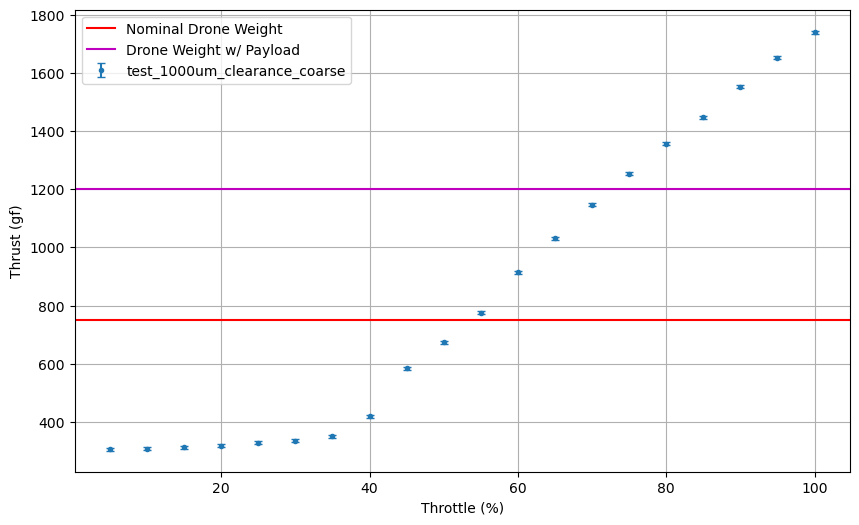

In [15]:
plt.figure(figsize=(10, 6))
for n, grp in df_thrust_power.groupby("test_name"):
    plt.errorbar(x=grp.index.get_level_values("throttle"), y="thrust_mean_g", yerr="thrust_g_err", data=grp, label=n, fmt='o', capsize=3, markersize=3)
plt.xlabel("Throttle (%)")
plt.ylabel("Thrust (gf)")
plt.axhline(hover_thrust_g, color="r", label="Nominal Drone Weight")
plt.axhline(payload_thrust_g, color="m", label="Drone Weight w/ Payload")
plt.legend()
plt.grid()
plt.show()

In [ ]:
# TODO: nominal thrust-weight ratio plot
# thrust_mean_g.iloc[-1] / hover_thrust_g

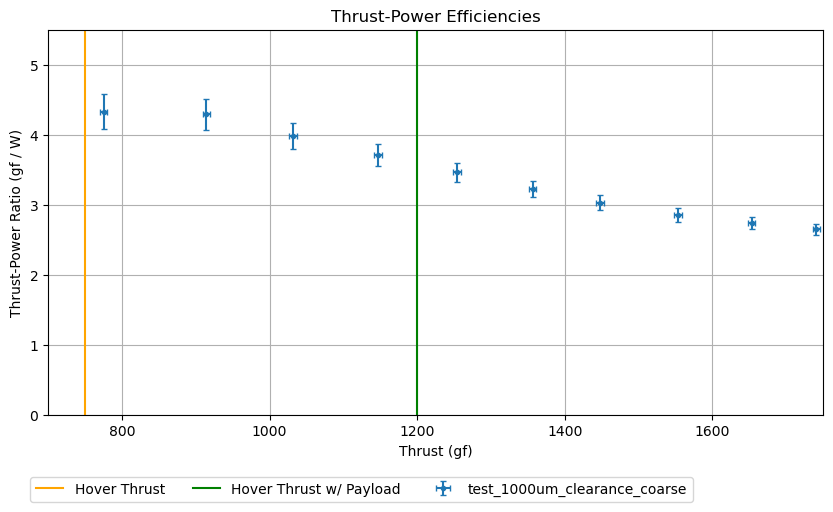

In [16]:
fig = plt.figure(figsize=(10, 5))
for n, grp in df_thrust_power.groupby("test_name"):
    plt.errorbar(x="thrust_mean_g", y="thrust_power_g_W", xerr="thrust_g_err", yerr="thrust_power_err", data=grp, label=n, fmt='o', markersize=3, capsize=2)
plt.xlabel("Thrust (gf)")
plt.ylabel("Thrust-Power Ratio (gf / W)")
plt.xlim(700, 1750)
plt.ylim(0,5.5)
plt.axvline(hover_thrust_g, color="orange", label="Hover Thrust")
plt.axvline(payload_thrust_g, color="g", label="Hover Thrust w/ Payload")
plt.grid()
plt.legend(ncols=3, bbox_transform=fig.transFigure, bbox_to_anchor=(0.1, 0), loc="upper left")
plt.title("Thrust-Power Efficiencies")
plt.show()

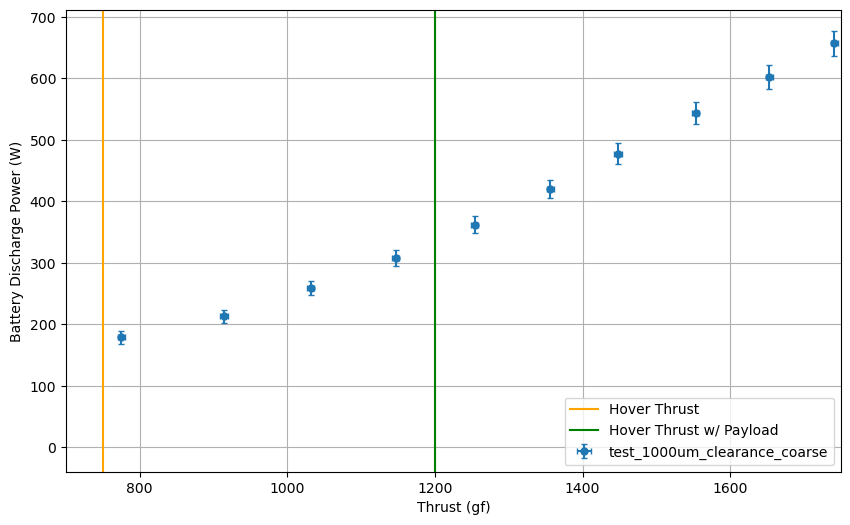

In [17]:
plt.figure(figsize=(10, 6))
for n, grp in df_thrust_power.groupby("test_name"):
    #plt.scatter(x="thrust_mean_g", y="batt_power_mean", data=grp, label=n, s=20)
    plt.errorbar(x="thrust_mean_g", y="batt_power_mean", xerr="thrust_g_err", yerr="batt_power_err", label=n, data=grp, fmt='o', capsize=2, markersize=5)
plt.xlabel("Thrust (gf)")
plt.ylabel("Battery Discharge Power (W)")
plt.xlim(700, 1750)
plt.grid()
plt.axvline(hover_thrust_g, color="orange", label="Hover Thrust")
plt.axvline(payload_thrust_g, color="g", label="Hover Thrust w/ Payload")
plt.legend()
plt.show()

In [18]:
characteristic_thrust = pd.Index(
    [hover_thrust_g, payload_thrust_g], name="thrust_mean_g"
)
# Interpolate power at hover and payload thrust
df_power_interp = (
    df_thrust_power.reset_index("throttle")
    .set_index("thrust_mean_g", append=True)
    .groupby("test_name")
    .apply(
        lambda g: (gd := g.droplevel("test_name").dropna())[
            ~gd.index.duplicated(keep="first")
        ]
        .reindex(gd.index.append(characteristic_thrust).unique())
        .sort_index()
        .interpolate(method="index", limit_area="inside")
        .loc[characteristic_thrust]
    )
)
df_power_interp

throttle  batt_power_mean  \
test_name                    thrust_mean_g                               
test_1000um_clearance_coarse 750.0          53.762078       169.829458   
                             1200.0         72.483014       335.068228   

                                            shunt_power_mean  \
test_name                    thrust_mean_g                     
test_1000um_clearance_coarse 750.0                233.567394   
                             1200.0               410.825844   

                                            thrust_power_g_W  \
test_name                    thrust_mean_g                     
test_1000um_clearance_coarse 750.0                  4.432758   
                             1200.0                 3.591465   

                                            shunt_thrust_power_g_W  \
test_name                    thrust_mean_g                           
test_1000um_clearance_coarse 750.0                        3.214280   
                             1200.0                       2.924285   

                                            batt_power_err  thrust_g_err  \
test_name                    thrust_mean_g                                 
test_1000um_clearance_coarse 750.0                9.917336           5.0   
                             1200.0              13.464147           5.0   

                                            thrust_power_err  
test_name                    thrust_mean_g                    
test_1000um_clearance_coarse 750.0                  0.262878  
                             1200.0                 0.145700

In [19]:
battery_capacity_Wh = 2 * 0.850 * 14.8
flight_time = pd.to_timedelta(
    battery_capacity_Wh / df_power_interp["batt_power_mean"], unit="h"
).rename("flight_time")
flight_time

test_name                     thrust_mean_g
test_1000um_clearance_coarse  750.0           0 days 00:08:53.335034214
                              1200.0          0 days 00:04:30.321064106
Name: flight_time, dtype: timedelta64[ns]

<Axes: title={'center': 'Flight time with a 4S 1700mAh battery pack'}, xlabel='Thrust (gf)', ylabel='Flight time (minutes)'>

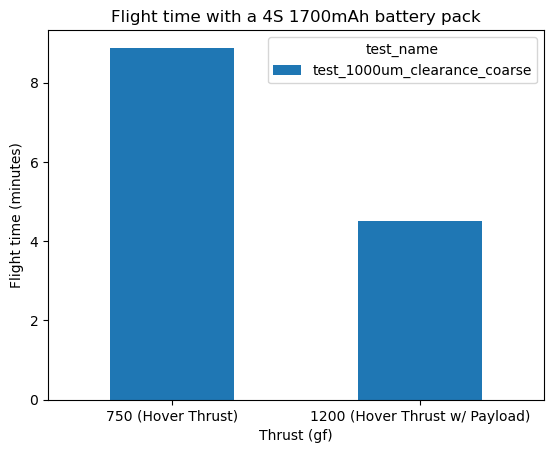

In [20]:
(
    flight_time.dt.seconds.unstack("test_name").rename(
        index={
            hover_thrust_g: f"{hover_thrust_g} (Hover Thrust)",
            payload_thrust_g: f"{payload_thrust_g} (Hover Thrust w/ Payload)",
        }
    )
    / 60
).plot.bar(
    title="Flight time with a 4S 1700mAh battery pack",
    xlabel="Thrust (gf)",
    ylabel="Flight time (minutes)",
    rot=0,
)